# Basic Convolutional Neural Networks (CNN)
- Objective: create basic CNN models with Keras

<img src="https://adeshpande3.github.io/assets/Cover.png" style="width: 800px"/>

<br>

- Fundamental CNN structures: CNNs are similar to Multilayer Perceptrons (MLPs) since they only feed signals forward (feedforward nets), but have different kind of layers unique to CNNs  
  - ** Convolutional layer** : process data in a small receptive field (i.e., filter)  
  - ** Pooling layer** : downsample along 2 dimensions (usually width and height)   
  - ** Dense (fully connected) layer** : similar to hidden layers of MLPs  

<img src="http://cs231n.github.io/assets/cnn/convnet.jpeg" style="width: 600px"/>
<br>
<center> **ConvNet architecture** </center>

In [1]:
!nvidia-smi
!uptime
!nproc

Thu May 21 11:39:59 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.33.01    Driver Version: 440.33.01    CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:1A:00.0 Off |                    0 |
| N/A   51C    P0    71W / 300W |  12717MiB / 32510MiB |     32%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla V100-SXM2...  Off  | 00000000:1C:00.0 Off |                    0 |
| N/A   50C    P0   178W / 300W |  12004MiB / 32510MiB |     38%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../common')
import plt_style as ps

from sklearn import datasets
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

/packages/7x/anaconda3/5.3.0/envs/tf1.13-gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/packages/7x/anaconda3/5.3.0/envs/tf1.13-gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/packages/7x/anaconda3/5.3.0/envs/tf1.13-gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/packages/7x/ana

### Load Datset
- Digits dataset in sklearn
- Doc: http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html

In [3]:
data = datasets.load_digits()

In [4]:
K,M,N = data.images.shape
FI = data.images[:10].reshape((10*M,N))
K

1797

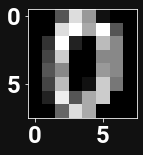

In [18]:
k=0
plt.close()
plt.figure(figsize=(2,2))
plt.imshow(FI[:8,:8],cmap=plt.cm.binary.reversed() )   # show first number in the dataset
#plt.title('label: %d' % data.target[k],fontsize=18,color='w')    # label = '0'
plt.show()

In [19]:
X_data = data.images
y_data = data.target

In [20]:
# shape of data
print(X_data.shape)    # (8 X 8) format
print(y_data.shape)

(1797, 8, 8)
(1797,)


In [21]:
data.target[0]

0

In [22]:
# reshape X_data into 3-D format
# note that this follows image format of Tensorflow backend
X_data = X_data.reshape((X_data.shape[0], X_data.shape[1], X_data.shape[2], 1))

In [23]:
# one-hot encoding of y_data
y_data = to_categorical(y_data)

In [24]:
print(f'Original first digit label: {data.target[0]}')
print('After one-hot encoding:', y_data[0])

Original first digit label: 0
After one-hot encoding: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [25]:
# partition data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 777)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1257, 8, 8, 1)
(540, 8, 8, 1)
(1257, 10)
(540, 10)


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

### 1. Creating model
- Creating a model is same with MLP (Sequential)
- Original notebook defined a model with an reLU activation layer. We run two of these original models and compare to a model without activation.

In [28]:
# Allow multiple models to have the same seed (note there is still randomness in the model fit)
from numpy.random import seed
from tensorflow import set_random_seed
seed(1)
set_random_seed(2)

In [29]:
orig_model0 = Sequential()
orig_model1 = Sequential()

### 2. Convolutional Layer
- In general, 2D convolutional layer is used for image processing
    - Size of filter (designated by 'kernel_size' parameter) defines **width and height of receptive field **
    - Number of filters (designated by 'filters' parameter) is equal to **depth of the next layer**
    - Strides (designated by 'strides' parameter) is** how far a filter makes change in its position** for each move
    - Image can be **zero-padded** in order to prevent getting too small (designated by 'padding' parameter)
- Doc: https://keras.io/layers/convolutional/

<img src="http://cs231n.github.io/assets/cnn/depthcol.jpeg" style="width: 400px"/>

In [30]:
# convolution layer
orig_model0.add(Conv2D(input_shape = (X_data.shape[1], X_data.shape[2], X_data.shape[3]), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'valid'))
orig_model1.add(Conv2D(input_shape = (X_data.shape[1], X_data.shape[2], X_data.shape[3]), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'valid'))

Instructions for updating:
Colocations handled automatically by placer.


### 3. Activation Layer
- Identical to the activation layers in MLP
- In general, rectified Linear Unit (reLU)  is used as well
- Note that Conv2d step may have applied activation through keyword argument
- Below, reLU activation function is demonstrated

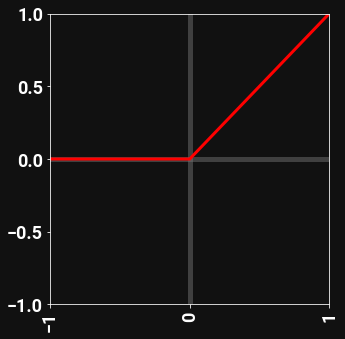

In [35]:
plt.figure(figsize=(5,5.35))
plt.clf()
x = np.linspace(-1,1,15)
myreLU = [ 0 if xx < 0 else xx for xx in x ]
plt.plot(x,0*x,'-',c=ps.gry,lw=5)    # x-axis
plt.plot(0*x,x,'-',c=ps.gry,lw=5)    # y-axis
plt.plot(x,myreLU,'r-',lw=3) # reLU
plt.xticks(color='w',fontsize=18,rotation=90)
plt.yticks(color='w',fontsize=18)
plt.xlim(-1,1)
plt.ylim(-1,1)
#plt.grid(which='major',linestyle='--',color='#777777')
plt.show()

Original model includes activation layer that will not contribute to output. 

Kept for pedagogical reasons, but ask yourself, why the reLU activation layer does not contribute to the result.

In [36]:
orig_model0.add(Activation('relu'))
orig_model1.add(Activation('relu'))

### 4. Pooling layer
- In general, max pooling method is used
- Common alternative is average pooling
- Reduces number of parameters
- Doc: https://keras.io/layers/pooling/

<img src="http://cs231n.github.io/assets/cnn/maxpool.jpeg" style="width: 600px"/>

In [37]:
orig_model0.add(MaxPooling2D(pool_size = (2,2)))
orig_model1.add(MaxPooling2D(pool_size = (2,2)))

### 5. Dense (fully connected layer)
- Convolutional & pooling layers can be connected to dense layers
- Sometimes, dense layers can be omitted
- Doc: https://keras.io/layers/core/

In [38]:
# prior layer should be flattend to be connected to dense layers
orig_model0.add(Flatten())
orig_model1.add(Flatten())

In [39]:
# dense layer with 50 neurons
orig_model0.add(Dense(50, activation = 'relu'))
orig_model1.add(Dense(50, activation = 'relu'))

In [40]:
# final layer with 10 neurons to classify the instances
orig_model0.add(Dense(10, activation = 'softmax'))
orig_model1.add(Dense(10, activation = 'softmax'))

### 6. Model compile & train
- Optimize with adaptive moment estimation (Adam)
- accuracy as the metric

In [41]:
adam = optimizers.Adam(lr = 0.001)
orig_model0.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
orig_model1.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

In [42]:
print('Original Model 0 Summary')
orig_model0.summary()
print('Original Model 1 Summary')
orig_model1.summary()

Original Model 0 Summary
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 6, 6, 10)          100       
_________________________________________________________________
activation (Activation)      (None, 6, 6, 10)          0         
_________________________________________________________________
activation_2 (Activation)    (None, 6, 6, 10)          0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 10)          0         
_________________________________________________________________
flatten (Flatten)            (None, 90)                0         
_________________________________________________________________
dense (Dense)                (None, 50)                4550      
_________________________________________________________________
dense_2 (Dense)              (None, 10)            

In [43]:
orig_history0 = orig_model0.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 1, shuffle=False)
print(72*'-')
orig_history1 = orig_model1.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 1, shuffle=False)

Train on 1005 samples, validate on 252 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1005/1005 [==============================] - 2s 2ms/sample - loss: 6.0894 - acc: 0.1065 - val_loss: 3.1320 - val_acc: 0.1905
Epoch 2/100
1005/1005 [==============================] - 0s 150us/sample - loss: 2.4928 - acc: 0.2478 - val_loss: 1.8154 - val_acc: 0.3611
Epoch 3/100
1005/1005 [==============================] - 0s 68us/sample - loss: 1.5406 - acc: 0.4925 - val_loss: 1.1577 - val_acc: 0.6349
Epoch 4/100
1005/1005 [==============================] - 0s 60us/sample - loss: 1.0611 - acc: 0.6955 - val_loss: 0.7762 - val_acc: 0.7897
Epoch 5/100
1005/1005 [==============================] - 0s 72us/sample - loss: 0.7769 - acc: 0.7930 - val_loss: 0.5684 - val_acc: 0.8373
Epoch 6/100
1005/1005 [==============================] - 0s 174us/sample - loss: 0.5997 - acc: 0.8378 - val_loss: 0.4405 - val_acc: 0.8730
Epoch 7/100
1005/1005 [==============================] - 0s 150us/sample - l

In [44]:
orig_history0.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

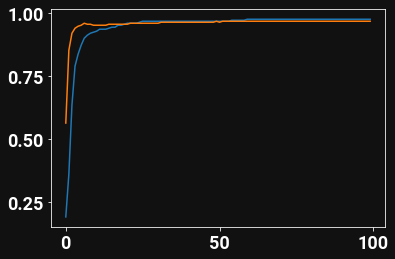

In [45]:
plt.clf()
plt.plot(orig_history0.history['val_acc'])
plt.plot(orig_history1.history['val_acc'])
plt.xticks(color='w',fontsize=18)
plt.yticks(color='w',fontsize=18)
plt.show()

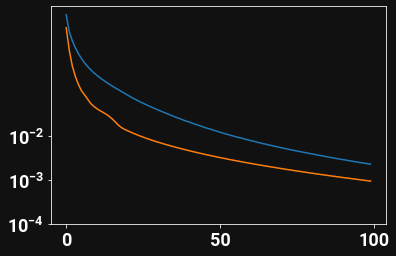

In [46]:
plt.clf()
plt.semilogy(orig_history0.history['loss'])
plt.semilogy(orig_history1.history['loss'])
plt.xticks(color='w',fontsize=18)
plt.yticks([1e-2,1e-3,1e-4],color='w',fontsize=18)
plt.show()

In [47]:
orig_results0 = orig_model0.evaluate(X_test, y_test,verbose=0)
orig_results1 = orig_model1.evaluate(X_test, y_test,verbose=0)

In [48]:
print('   0-Original Test accuracy: ', orig_results0[1])
print('   1-Original Test accuracy: ', orig_results1[1])
print('MUST PERFORM STATISTICS EVEN ON SIMPLE DATASETS')
print(' AND THINK CAREFULLY ABOUT THE LAYERS WE THINK WE ARE ADDING')

   0-Original Test accuracy:  0.9777778
   1-Original Test accuracy:  0.9722222
MUST PERFORM STATISTICS EVEN ON SIMPLE DATASETS
 AND THINK CAREFULLY ABOUT THE LAYERS WE THINK WE ARE ADDING


Summary
---

* Even simple CNN model shows fine performance of **97%** test accuracy
* Difficult to perform small change and measure outcomes deterministically, must use statistics
* Helps to functionally define model and evalute results to improve statistical appreciation of layer construction
* Relatively straightforward to program CNN on ASU HPC systems with Python.

In [49]:
!hostname

cg26-2.agave.rc.asu.edu


In [50]:
!nvidia-smi

Thu May 21 11:44:55 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.33.01    Driver Version: 440.33.01    CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:1A:00.0 Off |                    0 |
| N/A   51C    P0   152W / 300W |  32012MiB / 32510MiB |     71%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla V100-SXM2...  Off  | 00000000:1C:00.0 Off |                    0 |
| N/A   48C    P0   132W / 300W |  12311MiB / 32510MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T